## Observations and Insights 

In [208]:
%matplotlib notebook

In [209]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results=pd.merge( study_results,mouse_metadata,how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [210]:
# Checking the number of mice.
#mouse_study_results["Mouse ID"].count()

mice_numbe=mouse_study_results["Mouse ID"].nunique()
mice_numbe

249

In [211]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups = mouse_study_results[mouse_study_results.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mouse_ids=dups["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [212]:
# Optional: Get all the data for the duplicate mouse ID. 

#mouse_study_results.loc[mouse_study_results['Mouse ID'] in duplicate_mouse_ids]

dup_mice =mouse_study_results.loc[mouse_study_results["Mouse ID"]== "g989",:]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [213]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#cleanData=mouse_study_results.drop_duplicates(subset=['Mouse ID'],keep="first")
cleanData=mouse_study_results[mouse_study_results["Mouse ID"].isin(duplicate_mouse_ids)==False]
cleanData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [214]:
# Checking the number of mice in the clean DataFrame.
clean_mice= cleanData["Mouse ID"].value_counts()
clean_number_of_mice= len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [239]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_m = mouse_study_results.groupby("Drug Regimen")
drug_tumor=mouse_m['Tumor Volume (mm3)']
mean_numpy =drug_tumor.mean()
#print(f"The mean tumor volume for each regimen is {mean_numpy}")

median_numpy =  drug_tumor.median()
#print(f"The median tumor volume for each regimen is {median_numpy}")

variance_mice =  drug_tumor.var()
#print(f"The mode tumor volume for each regimen is {variance_mice}")

standard_deviation_mice = drug_tumor.std()
#print(f"The standard_deviation tumor volume for each regimen is {standard_deviation_mice}")

sem_mice = drug_tumor.sem()
#print(f"The sem of  tumor volume for each regimen is {sem_mice}")


# Assemble the resulting series into a single summary dataframe.
resulting_series = pd.DataFrame({"tumor_mean_numpy":mean_numpy,"tumor_median_numpy":median_numpy,
                                         "tumor_variance_mice":variance_mice,"tumor_standard_deviation_mice":standard_deviation_mice,
                                        "tumor_sem_mice":sem_mice})
resulting_series


,tumor_mean_numpy,tumor_median_numpy,tumor_variance_mice,tumor_standard_deviation_mice,tumor_sem_mice
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [240]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
resulting_series = pd.DataFrame([mean_numpy,median_numpy,
                                         variance_mice,standard_deviation_mice,
                                        sem_mice])
resulting_series 



Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


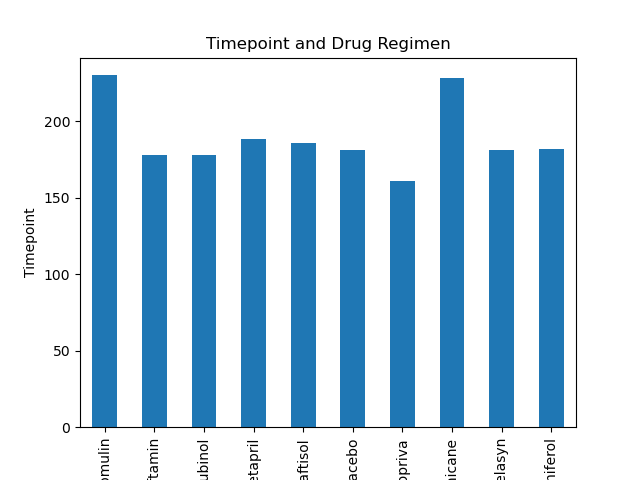

In [266]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.close()
mouse_t_d = mouse_study_results.groupby("Drug Regimen")["Timepoint"].count()
plt.title("Timepoint and Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
mouse_t_d.plot(kind="bar")
plt.show()

<IPython.core.display.Javascript object>


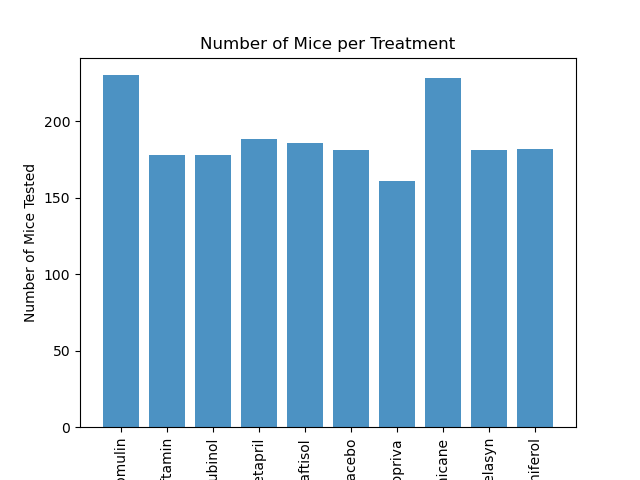

In [267]:
plt.close()
x_axis=mouse_t_d.index.values
y_axis= mouse_t_d.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")
plt.show()

<IPython.core.display.Javascript object>


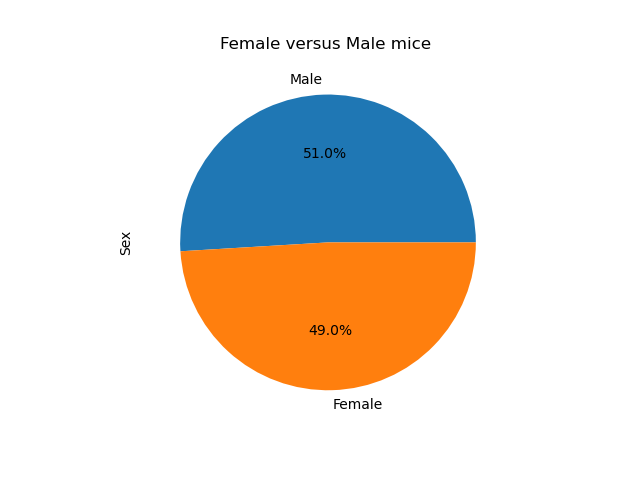

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#mice_sex = ("Sex")
plt.close()
mouse_sex=cleanData["Sex"].value_counts()

mouse_sex.plot.pie(autopct="%1.1f%%")
plt.title("Female versus Male mice ")
plt.show()


<IPython.core.display.Javascript object>


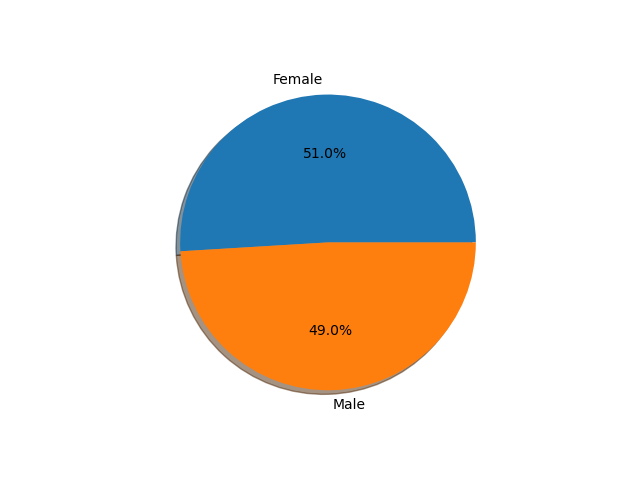

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.close()
sex_name=["Female","Male"]
plt.pie(mouse_sex,labels=sex_name, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#grouped_mice_data = mouse_study_results[mouse_study_results['Drug Regimen'].isin(options)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_results.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_data=pd.merge(mouse_metadata, max_timepoint, on="Mouse ID")

filtered_max_data = max_data[max_data['Drug Regimen'].isin(options)]
filtered_max_data[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen"]]


,Mouse ID,Tumor Volume (mm3),Drug Regimen
0,k403,22.050126,Ramicane
1,s185,23.343598,Capomulin
2,x401,28.484033,Capomulin
3,m601,28.430964,Capomulin
4,g791,29.128472,Ramicane
...,...,...,...
235,x822,61.386660,Ceftamin
237,y163,67.685569,Infubinol
241,y769,68.594745,Ceftamin
242,y865,64.729837,Ceftamin


In [235]:
#Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Infubinol's potential outliers: 31    36.321346
#Name: Tumor Volume (mm3), dtype: float64
#Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

#Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin

# Put treatments into a list for for loop (and later for plot labels)

for treatment in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    data = []
    data = filtered_max_data[(filtered_max_data['Drug Regimen'] == treatment)]["Tumor Volume (mm3)"]
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_range = lowerq - (1.5*iqr)
    upper_range = upperq + (1.5*iqr)

    outliers = [x for x in data if ((x < lower_range) or (x > upper_range))]
    
    print(treatment + "'s potential outliers: ")
    print(outliers)
    

    
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: 
[]
Ramicane's potential outliers: 
[]
Infubinol's potential outliers: 
[36.3213458]
Ceftamin's potential outliers: 
[]


In [236]:

drug=[capomulin, ramicane, infubinol, ceftamin]
list_lenght=len(drug)
treatment=0
for i in range (list_lenght):
    quartiles =drug[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    vlower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #if treatment==0:
for values in drug: 
    print(f"The lower quartile of is: {lowerq}")
    print(f"The upper quartile of is: {upperq}")
    print(f"The interquartile range of is: {iqr}")
    print(f"The the median of  is: {quartiles[0.5]} ")

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-------------------------------------------------------------")
    #treatment+=1
#print(list1)


The lower quartile of is: 48.72207785
The upper quartile of is: 64.29983003
The interquartile range of is: 15.577752179999997
The the median of  is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------------------------
The lower quartile of is: 48.72207785
The upper quartile of is: 64.29983003
The interquartile range of is: 15.577752179999997
The the median of  is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------------------------
The lower quartile of is: 48.72207785
The upper quartile of is: 64.29983003
The interquartile range of is: 15.577752179999997
The the median of  is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------------------------------------
The lower quartile of is:

<IPython.core.display.Javascript object>


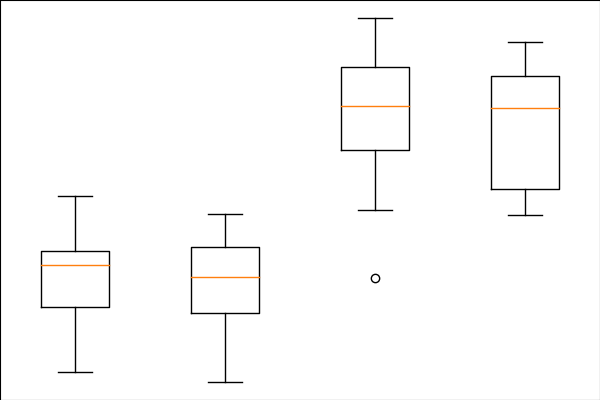

In [274]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Tumor_boxplot=filtered_max_data[[ "Drug Regimen","Tumor Volume (mm3)"]]
#Tumor_boxplot.plot(kind='box')
plt.close()
capomulin = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Capomulin')]["Tumor Volume (mm3)"]
ramicane = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Ramicane')]["Tumor Volume (mm3)"]
infubinol = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Infubinol')]["Tumor Volume (mm3)"]
ceftamin = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Ceftamin')]["Tumor Volume (mm3)"]
 
drug=[capomulin, ramicane, infubinol, ceftamin]
fig = plt.figure(figsize =(6, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(drug)
 
# show plot
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


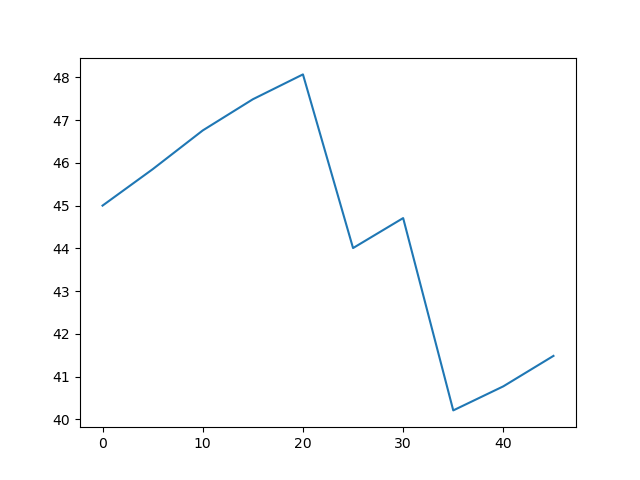

In [270]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.close()
capomulin = mouse_study_results[(mouse_study_results['Drug Regimen'] == 'Capomulin')]
capomulin_for_l509 = capomulin[capomulin["Mouse ID"] == 'l509']
capomulin_y = capomulin_for_l509["Tumor Volume (mm3)"]
capomulin_x = capomulin_for_l509["Timepoint"]
plt.plot(capomulin_x, capomulin_y)
plt.show()

<IPython.core.display.Javascript object>


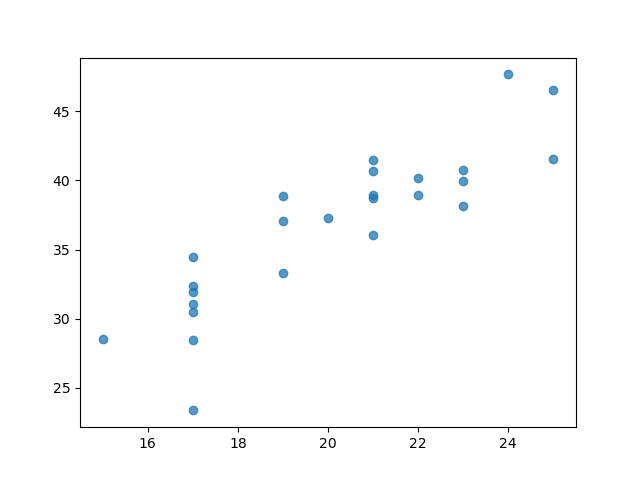

In [278]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.close()
capomulin = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Capomulin')]["Tumor Volume (mm3)"]
capomulin
capomulin_w = filtered_max_data[(filtered_max_data['Drug Regimen'] == 'Capomulin')]["Weight (g)"]
capomulin_w
plt.scatter(capomulin_w, capomulin, marker="o", 
             alpha=0.75)
plt.show()

## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_w,capomulin)
correlation

PearsonRResult(statistic=0.8767060403658115, pvalue=9.08442908867354e-09)

In [228]:
plt.close()
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_w, capomulin)
regress_values =capomulin_w * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_w,capomulin)
plt.plot(capomulin_w,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7686134812139002
